In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from math import sin
from math import cos

In [2]:
#setup geometry

#assume the earth is a sphere, not an oblate spheroid

num_lat_zones = 18
zonal_width = 90/num_lat_zones
lats = np.linspace(-85,85,18)
lats_rad = lats*(pi/180)
delta_rad = (pi/2)/num_lat_zones/2
lats_frac=np.zeros(18)

for i in range(18):
    lats_frac[i] = sin(lats_rad[i]+delta_rad) - sin(lats_rad[i]-delta_rad)

print(lats_frac)

#geometry successfully setup

[0.00760336 0.02257906 0.0368687  0.05003811 0.06168713 0.07146182
 0.07906518 0.08426619 0.0869068  0.0869068  0.08426619 0.07906518
 0.07146182 0.06168713 0.05003811 0.0368687  0.02257906 0.00760336]


In [3]:
#setup insolation
#constants needed for insolation setup

solar_constant=1370
max_tilt=23.5
days_in_year=365
hours_in_day=24
zonal_degrees=360
total_solar=0.0

In [4]:
#calculate effective solar constant (considering sun angle and day/night cycle)

for hour in range(hours_in_day):
    noon_angle=zonal_degrees*(hour/hours_in_day)
    for longitude in range(zonal_degrees):
        sun_angle=longitude-noon_angle
        total_solar=total_solar+solar_constant*max(0,cos((pi/180)*sun_angle))

solar_constant=total_solar/(hours_in_day*zonal_degrees)
print(solar_constant)
#solar constant reasonable

436.0734741032062


In [5]:
#compute average insolation for each latitude band

insolation=np.zeros(num_lat_zones)

for day in range(days_in_year):
    tilt=max_tilt*cos(2.0*pi*day/(days_in_year+1))
    for j in range(num_lat_zones):
        zenith=min(lats[j]+tilt,90.0)
        insolation[j]=insolation[j]+cos(zenith*pi/180)

insol=solar_constant*insolation/days_in_year
insolation=insolation

avg_insolation=(sum(lats_frac,insolation))
print(avg_insolation)

#insolation values for each latitude band are again reasonable

[ 31.09533615  91.16405345 148.49321056 201.34089005 248.10134192
 287.3537735  317.90551952 338.82828064 349.48632935 349.55582623
 339.03465966 318.24250995 287.81113606 248.66517987 201.99407147
 149.21588887 101.75002582  64.08835228]


In [6]:
#set up parameters for solve_temp


albedo_ice=0.60
albedo_land=0.30
temp_critical=-10

Text(0.5, 1.0, 'Steady State Solution')

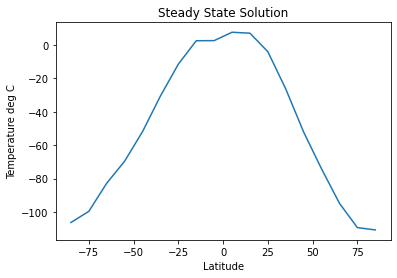

In [7]:
def solve_temp(solar_mult):
    insol=343
    insolation=np.array([343*0.500,343*0.531,343*0.624,343*0.770,343*0.892,343*1.021,343*1.120,343*1.189,343*1.219,343*1.219,
                        343*1.189,343*1.120,343*1.021,343*0.892,343*0.770,343*0.624,343*0.531,343*0.500])
    step_num = 1                 
    max_temp_diff = 1.0E6       
    tol_temp_diff = 0.05         
    max_steps = 100              
    F=3.8
    A=204
    B=2.17
    Ce=2.08e8
    #temp=np.array([-16.9,-12.3,-5.1,2.2,8.8,16.2,22.9,26.1,26.4,26.1,24.6,21.4,16.5,9.9,2.9,-6.9,-29.5,-42.3])
    temp_avg=14
    temp=np.zeros(18)
    albedo=np.array([0.589,0.544,0.452,0.407,0.357,0.309,0.272,0.248,0.254,0.241,0.236,0.251,0.296,0.358,0.426,0.513,0.602,0.617])
    while step_num < max_steps:
        insolation=np.array([343*0.500,343*0.531,343*0.624,343*0.770,343*0.892,343*1.021,343*1.120,343*1.189,343*1.219,343*1.219,
                        343*1.189,343*1.120,343*1.021,343*0.892,343*0.770,343*0.624,343*0.531,343*0.500])
        albedo=2*np.array([0.589,0.544,0.452,0.407,0.357,0.309,0.272,0.248,0.254,0.241,0.236,0.251,0.296,0.358,0.426,0.513,0.602,0.617])
        temp_avg=14
        temp_old=temp
        step_num=step_num+1
        temp_avg=sum(lats_frac,temp)
        temp=(insolation*(1-albedo)+F*temp_avg-A)/(B+F)
        max_temp_diff=max(abs(temp_old-temp))
    return temp

temptest=solve_temp(1)
plt.plot(lats,solve_temp(1))
plt.xlabel('Latitude')
plt.ylabel('Temperature deg C')
plt.title('Steady State Solution')

In [8]:
#now, set up simple differential equation
tempavg=15
albedo=np.array([0.589,0.544,0.452,0.407,0.357,0.309,0.272,0.248,0.254,0.241,0.236,0.251,0.296,0.358,0.426,0.513,0.602,0.617])
insol=np.array([343*0.500,343*0.531,343*0.624,343*0.770,343*0.892,343*1.021,343*1.120,343*1.189,343*1.219,343*1.219,
                    343*1.189,343*1.120,343*1.021,343*0.892,343*0.770,343*0.624,343*0.531,343*0.500])
insolation=insol*(31536000**3)
temp=np.array([-16.9,-12.3,-5.1,2.2,8.8,16.2,22.9,26.1,26.4,26.1,24.6,21.4,16.5,9.9,2.9,-6.9,-29.5,-42.3])
F=3.80*(31536000**2)
A=204*(31536000**3)
B=2.17*(31536000**3)
Ce=2.08e8*(31536000**2)
time=np.linspace(2020,2038,18)
temptime=np.zeros(100)
tchange=np.zeros(18)
time=np.linspace(2020,2038,18)
temp=np.array([-16.9,-12.3,-5.1,2.2,8.8,16.2,22.9,26.1,26.4,26.1,24.6,21.4,16.5,9.9,2.9,-6.9,-29.5,-42.3])
tc=np.zeros(18)

for i in range(9):
    tc = ((1.01*insolation[0:18]*(1 - albedo[0:18])) - (A + B*temp[0:18]+F*(temp[0:18]-tempavg)))/(Ce)
    temp=temp+tc    
    tempavg=sum(temp)/len(temp)
    

def solve_temp_ode(x,y):
    time=np.linspace(1,18,18)
    temp=np.array([-16.9,-12.3,-5.1,2.2,8.8,16.2,22.9,26.1,26.4,26.1,24.6,21.4,16.5,9.9,2.9,-6.9,-29.5,-42.3])
    i=0
    tempavg=np.zeros(80)
    for i in range(80):
        tc = ((1.045*insolation[0:18]*(1 - albedo[0:18])) - (A + B*temp[0:18]+F*(temp[0:18]-tempavg[i])))/(Ce)
        temp=temp+tc
        tempavg[i]=sum(temp)/len(temp)
    return tempavg

test=solve_temp_ode(time,temp)
print(test)

[3.4292128  2.3379456  1.6057112  1.11438587 0.78470924 0.56349799
 0.41506644 0.31546968 0.24864078 0.20379896 0.17371033 0.15352103
 0.13997412 0.13088421 0.12478493 0.12069235 0.11794625 0.11610363
 0.11486724 0.11403764 0.11348097 0.11310745 0.11285683 0.11268866
 0.11257581 0.1125001  0.11244929 0.1124152  0.11239233 0.11237698
 0.11236668 0.11235977 0.11235513 0.11235202 0.11234994 0.11234853
 0.1123476  0.11234696 0.11234654 0.11234626 0.11234607 0.11234594
 0.11234585 0.1123458  0.11234576 0.11234573 0.11234571 0.1123457
 0.11234569 0.11234569 0.11234569 0.11234568 0.11234568 0.11234568
 0.11234568 0.11234568 0.11234568 0.11234568 0.11234568 0.11234568
 0.11234568 0.11234568 0.11234568 0.11234568 0.11234568 0.11234568
 0.11234568 0.11234568 0.11234568 0.11234568 0.11234568 0.11234568
 0.11234568 0.11234568 0.11234568 0.11234568 0.11234568 0.11234568
 0.11234568 0.11234568]


In [9]:
# Runge-Kutta 4th order
def rk4(f, x0, y0, x1, n):
    h = (x1 - x0) / n
    x = np.arange(x0, x1, h)
    y = np.zeros((n + 1))
    y[0] = y0
    for i in range(80):
        k1 = h * f(x[i],y[i])
        k2 = h * f(x[i] + h / 2, y[i] + k1 / 2)
        k3 = h * f(x[i] + h / 2, y[i] + k2 / 2)
        k4 = h * f(x[i] + h, y[i] + k3)    
        y[i+1] = y[i] + ((k1 + 2 * k2 + 2 * k3 + k4) / 6)[i]          
    return x, y

In [10]:
time=np.linspace(2020,2100,80)
temp_rk4=rk4((solve_temp_ode),2020,14,2100,80)
print(temp_rk4)
time1=temp_rk4[0]
temp1=temp_rk4[1]
temp2=temp1[0:80]


(array([2020., 2021., 2022., 2023., 2024., 2025., 2026., 2027., 2028.,
       2029., 2030., 2031., 2032., 2033., 2034., 2035., 2036., 2037.,
       2038., 2039., 2040., 2041., 2042., 2043., 2044., 2045., 2046.,
       2047., 2048., 2049., 2050., 2051., 2052., 2053., 2054., 2055.,
       2056., 2057., 2058., 2059., 2060., 2061., 2062., 2063., 2064.,
       2065., 2066., 2067., 2068., 2069., 2070., 2071., 2072., 2073.,
       2074., 2075., 2076., 2077., 2078., 2079., 2080., 2081., 2082.,
       2083., 2084., 2085., 2086., 2087., 2088., 2089., 2090., 2091.,
       2092., 2093., 2094., 2095., 2096., 2097., 2098., 2099.]), array([14.        , 17.4292128 , 19.76715839, 21.37286959, 22.48725546,
       23.2719647 , 23.83546269, 24.25052914, 24.56599881, 24.81463959,
       25.01843855, 25.19214889, 25.34566992, 25.48564403, 25.61652825,
       25.74131318, 25.86200553, 25.97995178, 26.09605541, 26.21092266,
       26.32496029, 26.43844127, 26.55154872, 26.66440555, 26.7770942 ,
       26.8896

Text(0, 0.5, 'Temperature (C)')

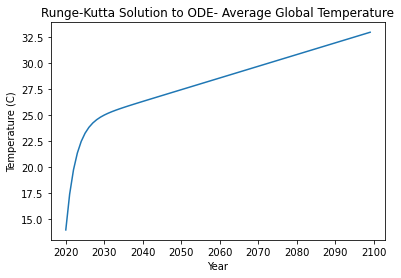

In [11]:
plt.plot(time1,temp2)
plt.title('Runge-Kutta Solution to ODE- Average Global Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (C)')

In [12]:
temp=np.zeros(num_lat_zones)
temp_avg=np.zeros(num_lat_zones)
for j in range(num_lat_zones):
    temp[j]=-60.0

solar_mult=np.zeros(140)
#for k in range(140):
#    solar_mult[k]=k/100
#    temp_avg=solve_temp(solar_mult);
#    k=k+1
    
#plt.plot(solve_temp(2))
#plt.plot(solar_mult,temp_avg)
#plt.title('Average Temperature versus Solar Multiplier')
#xlabel('Solar Multiplier')
#ylabel('Average Temperature')


In [13]:
#for k in range(60:140):
#    solar_mult[k]=k/100;
#    temp_avg[k]=solve_temp(solar_mult[k])
    
#plt.plot(solar_mult,temp_avg)
#plt.title('Average Temperature versus Solar Multiplier')
#xlabel('Solar Multiplier')
#ylabel('Average Temperature')

# 